# Exploratory Data Analysis (EDA)

What to Look For:

- **Dataset size:** Do you have enough data? (Generally want 100+ samples).
- **Feature types:** Which columns are numbers vs text/categories?
- **Missing values:** Are there empty cells in your data?
- **Data ranges:** Do the numbers make sense for what they represent?

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We use the unprocessed version of the features to visualize the data like it's in reality
X_train = pd.read_csv("../data/processed/X_train_unprocessed.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
X_test = pd.read_csv("../data/processed/X_test_unprocessed.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

target_variable = "volume_per_ha"

## Essential Dataset Overview Steps

In [41]:
# Basic dataset information
print("Dataset Shape:", X_train.shape)  # (rows, columns)
print("Number of features:", len(X_train.columns))
print("Number of samples:", len(X_train))

# Look at the first few rows
print(X_train.head())

# Get basic info about each column
print(X_train.info())

# Basic statistics for numerical columns
print(X_train.describe())

Dataset Shape: (3314, 7)
Number of features: 7
Number of samples: 3314
   id  yield_class  age  average_height       dbh     taper  trees_per_ha
0   5         11.0  120       30.500000  42.90000  0.487000         340.0
1  92          3.0   70        9.600000  15.20000  0.472000        1416.0
2  89          4.0  130       20.113594  31.38124  0.430897         611.0
3  20          8.0  190       26.500000  67.80000  0.482712         164.0
4  13          9.0   50       21.900000  30.20000  0.465000         437.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3314 entries, 0 to 3313
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3314 non-null   int64  
 1   yield_class     3314 non-null   float64
 2   age             3314 non-null   int64  
 3   average_height  3314 non-null   float64
 4   dbh             3314 non-null   float64
 5   taper           3314 non-null   float64
 6   trees_per_ha  

## Quick Quality Checks

In [42]:
# Check for missing values
missing_data = X_train.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])

# Check data types
print("\nData types:")
print(X_train.dtypes)

# Look for duplicate rows
duplicates = X_train.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

Missing values per column:
Series([], dtype: int64)

Data types:
id                  int64
yield_class       float64
age                 int64
average_height    float64
dbh               float64
taper             float64
trees_per_ha      float64
dtype: object

Duplicate rows: 0


## Basic target statistics

**What to Look For:**

- Shape of distribution: Is it bell-shaped (normal) or skewed?
- Range: Are the values what you'd expect?
- Outliers: Are there extremely high or low values?
- Zeros or negatives: Do these make sense for your problem?

**Common Target Patterns:**

- Normal distribution: Bell-shaped, mean ≈ median (good for linear models).
- Right-skewed: Long tail on the right, mean > median (common for prices, counts).
- Left-skewed: Long tail on the left, mean < median (less common).
- Bimodal: Two peaks (might indicate two different groups).

In [43]:
print("Target Variable Analysis:")
print(f"Mean: {y_train.mean()}")
print(f"Median: {y_train.median()}")
print(f"Standard Deviation: {y_train.std()}")
print(f"Minimum: {y_train.min()}")
print(f"Maximum: {y_train.max()}")

# Check for missing values in target
print(f"Missing values: {y_train.isnull().sum()}")

Target Variable Analysis:
Mean: volume_per_ha    453.653712
dtype: float64
Median: volume_per_ha    425.5
dtype: float64
Standard Deviation: volume_per_ha    264.717746
dtype: float64
Minimum: volume_per_ha    4.0
dtype: float64
Maximum: volume_per_ha    1421.0
dtype: float64
Missing values: volume_per_ha    0
dtype: int64


## Visualizing your target

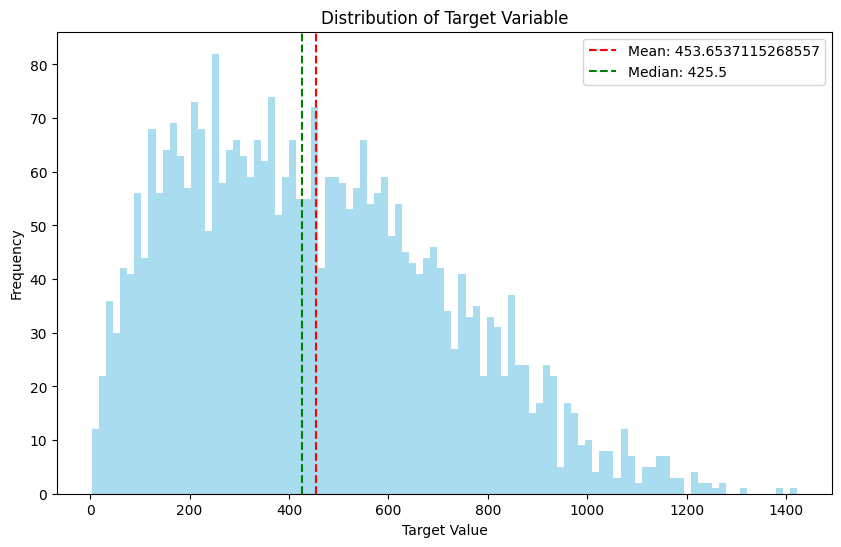

In [44]:
# Create a simple histogram
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=100, alpha=0.7, color="skyblue")
plt.axvline(
    y_train[target_variable].mean(),
    color="red",
    linestyle="--",
    label=f"Mean: {y_train[target_variable].mean()}",
)
plt.axvline(
    y_train[target_variable].median(),
    color="green",
    linestyle="--",
    label=f"Median: {y_train[target_variable].median()}",
)
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.title("Distribution of Target Variable")
plt.legend()
plt.show()

## Understanding Your Target Variable - What Am I Trying to Predict?

Your target variable is the heart of your regression problem - it's what you're trying to predict. Understanding its distribution, range, and characteristics is crucial because these properties directly influence your choice of algorithms, preprocessing steps, and evaluation metrics.

**Key Target Characteristics to Analyze:**

- **Distribution shape:** Is it bell-shaped (normal), skewed, or has multiple peaks?
- **Range and scale:** What are the minimum, maximum, and typical values?
- **Outliers:** Are there extreme values that might represent errors or special cases?
- **Missing values:** Any gaps in your target that need addressing?

       volume_per_ha
count        3314.00
mean          453.65
std           264.72
min             4.00
25%           238.00
50%           425.50
75%           634.00
max          1421.00


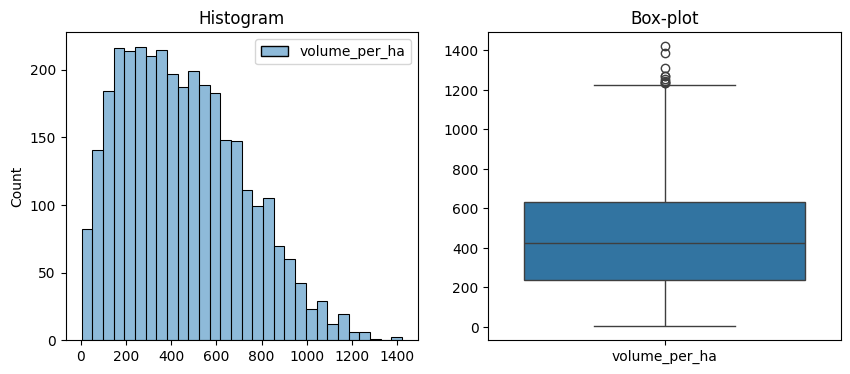

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(y_train, ax=ax[0], bins=30)
ax[0].set_title("Histogram")
sns.boxplot(y_train, ax=ax[1])
ax[1].set_title("Box-plot")
print(y_train.describe().round(2))

## Numerical Features – Fast Stats & Distributions

Numeric stats:
                   mean      std    min       max
id               44.56    38.91   1.00     93.00
yield_class       8.49     4.65   1.00     30.00
age              96.69    53.97  20.00    250.00
average_height   22.68     8.96   3.53     45.10
dbh              30.34    13.24   3.20     83.00
taper             0.45     0.04   0.07      0.99
trees_per_ha    949.20  1024.82  97.00  14698.00


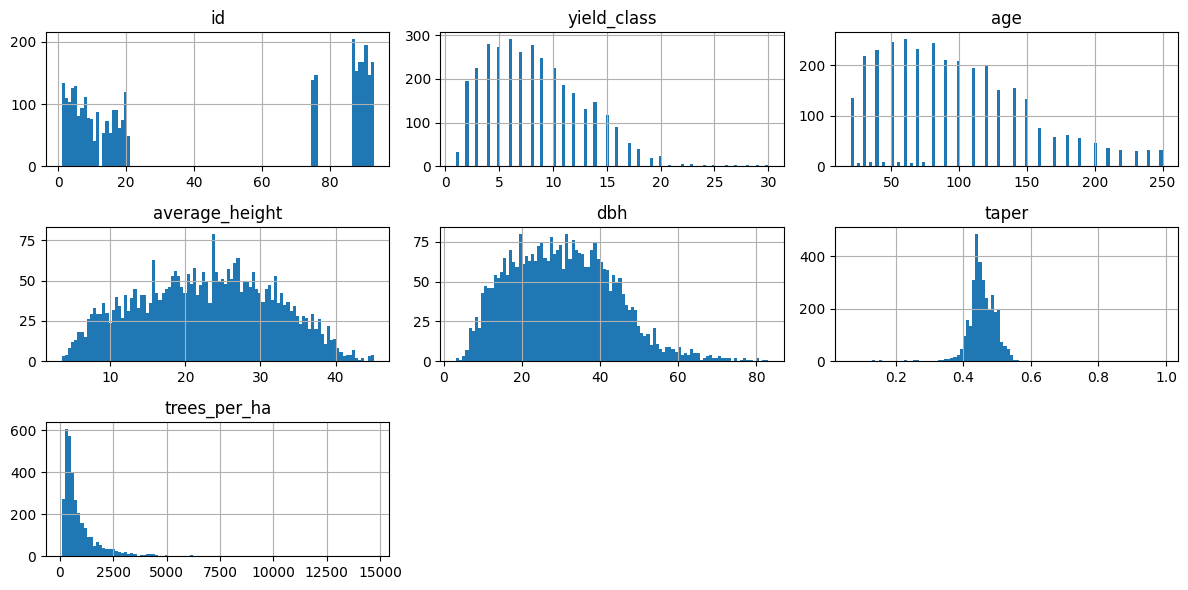

In [53]:
num_cols = X_train.select_dtypes("number").columns
print(
    "Numeric stats:\n",
    X_train[num_cols].describe().T[["mean", "std", "min", "max"]].round(2),
)
# Plot first 7 histograms
X_train[num_cols[:7]].hist(bins=100, figsize=(12, 6))
plt.tight_layout()
plt.show()

## Numeric ↔ Target Correlation

The correlation between numerical features and your target variable reveals which features are likely to be useful predictors. This analysis helps you prioritize which features to focus on during modeling and identifies potential star performers that might drive your model's success.

**Understanding Correlation Strength:**

- |r| > 0.7: Very strong relationship - likely excellent predictor.
- 0.3 < |r| < 0.7: Moderate relationship - good predictor candidate.
- 0.1 < |r| < 0.3: Weak relationship - might be useful in combination.
- |r| < 0.1: Very weak relationship - consider removing.

Top correlations:
 average_height    0.912
dbh               0.772
trees_per_ha     -0.528
age               0.516
yield_class       0.437
id                0.156
taper            -0.049
dtype: float64


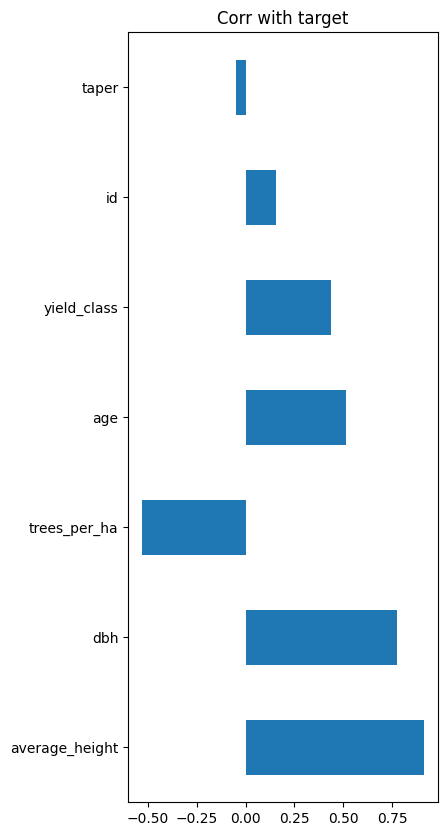

In [47]:
correlations = X_train.corrwith(y_train[target_variable]).sort_values(
    key=abs, ascending=False
)
print("Top correlations:\n", correlations.head(10).round(3))
correlations.head(10).plot.barh(figsize=(4, 10))
plt.title("Corr with target")
plt.show()

## Categorical Features – Frequency & Target Mean

**Key Categorical Analysis Elements:**

- **Cardinality:** How many unique categories exist.
- **Frequency distribution:** Which categories are common vs rare.
- **Target differences:** How much the target varies across categories.
- **Missing patterns:** Whether missing categorical data follows any pattern.

In [48]:
# No categorical columns left since they are already transformed above
cat_cols = X_train.select_dtypes("object").columns

for col in cat_cols:
    if X_train[col].nunique() <= 500:
        df = X_train.assign(target=y_train)
        summary = (
            df.groupby(col)["target"]
            .agg(["count", "mean"])
            .sort_values(by="count", ascending=False)
        )
        print(f"\n{col}:\n", summary)
        summary["mean"].plot.bar(figsize=(6, 3))
        plt.title(f"{col}→target")
        plt.show()

## Missing-Data Map

**Types of Missing Data Patterns:**

- **Random missing:** Scattered gaps with no clear pattern.
- **Systematic missing:** Missing values concentrated in specific rows/columns.
- **Informative missing:** Absence indicates something meaningful (e.g., "income" missing for unemployed people).

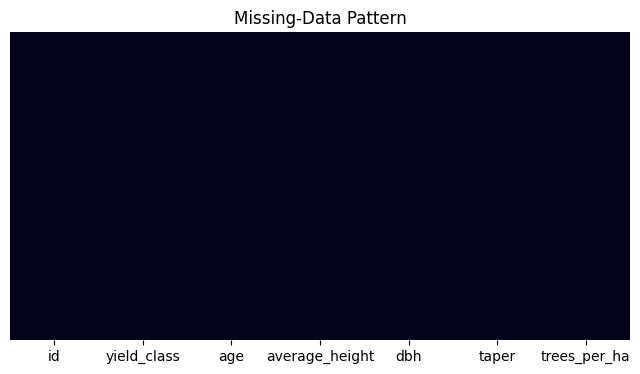

In [49]:
plt.figure(figsize=(8, 4))
sns.heatmap(X_train.isnull(), cbar=False, yticklabels=False)
plt.title("Missing-Data Pattern")
plt.show()

# Outlier Detection (IQR Rule)

Why Outliers Matter:

- **Model sensitivity:** Linear models are heavily influenced by extreme values.
- **Scale distortion:** Outliers can make normal data appear compressed.
- **Feature engineering impact:** Scaling and transformation decisions affected by extremes.

In [50]:
def iqr_outliers(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    return s[(s < q1 - 1.5 * iqr) | (s > q3 + 1.5 * iqr)]


for col in num_cols[:20]:
    outs = iqr_outliers(X_train[col])
    print(f"{col}: {len(outs)} outliers ({len(outs)/len(X_train)*100:.1f}%)")

id: 0 outliers (0.0%)
yield_class: 35 outliers (1.1%)
age: 0 outliers (0.0%)
average_height: 0 outliers (0.0%)
dbh: 24 outliers (0.7%)
taper: 70 outliers (2.1%)
trees_per_ha: 281 outliers (8.5%)


## Feature Multicollinearity - Avoiding Redundancy

Why Multicollinearity Matters:

- **Model instability:** Small data changes can cause large coefficient changes.
- **Interpretation difficulty:** Hard to isolate individual feature effects.
- **Computational waste:** Processing redundant information.
- **Overfitting risk:** More parameters than necessary for the same predictive power.

In [51]:
corr_mat = X_train[num_cols].corr().abs()
high_corr = np.where((corr_mat > 0.8) & (corr_mat < 1.0))
pairs = [
    (num_cols[i], num_cols[j], corr_mat.iat[i, j]) for i, j in zip(*high_corr) if i < j
]
print("High-corr pairs:", pairs[:5])

High-corr pairs: [('average_height', 'dbh', np.float64(0.867741057335326))]


## EDA Summary Dashboard - Key Insights at a Glance

In [52]:
print("🚀 EDA SNAPSHOT")
print(f"Target skew: {y_train.skew()}")
print("Strongest predictor:", correlations.index[0], correlations.max().round(3))
miss = (X_train.isnull().mean() * 100).sort_values(ascending=False).head(3)
print("Top missing cols:\n", miss.round(1))
print("High-corr pairs:", pairs[:3])

🚀 EDA SNAPSHOT
Target skew: volume_per_ha    0.507356
dtype: float64
Strongest predictor: average_height 0.912
Top missing cols:
 id             0.0
yield_class    0.0
age            0.0
dtype: float64
High-corr pairs: [('average_height', 'dbh', np.float64(0.867741057335326))]
